<a href="https://colab.research.google.com/github/laym0ura/projetos_ciencia_de_dados/blob/main/ML_aplicado_a_petrofisica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação e importação das bibliotecas necessárias

In [1]:
# instando a biblioteca dlisio
# pip é o gerenciador de pacotes do Python.
# ele permite instalar, atualizar e remover pacotes (bibliotecas e módulos) que você pode usar em seus projetos python

!pip install dlisio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.5/732.5 kB 7.1 MB/s eta 0:00:00


In [2]:
# importando as bibliotecas necessárias
from google.colab import drive

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from dlisio import dlis

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# montando o google drive no google colab
drive.mount('/content/drive')

Mounted at /content/drive


# Visualização e limpeza dos dados

## Leitura do dado csv

In [4]:
# lendo o arquivo CSV (os dados) e transformando em um dataframe
df = pd.read_csv('/content/drive/MyDrive/dados_minicurso_ml_petrofisica/dados_minicurso.csv')

## Visualização das colunas do dataframe

In [5]:
# visualizando as colunas do dataframe
df.columns

Index(['Unnamed: 0', 'DEPTH_MD', 'CALI', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'FORCE_2020_LITHOFACIES_LITHOLOGY'],
      dtype='object')

## Exclusão de uma coluna do dataframe

In [6]:
# excluindo uma coluna errada do dado
df.drop('Unnamed: 0', axis=1, inplace=True)

## Visualização de um resumo dos dados

In [7]:
# visualizando um resumo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122387 entries, 0 to 122386
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   DEPTH_MD                          122387 non-null  float64
 1   CALI                              118944 non-null  float64
 2   RDEP                              122376 non-null  float64
 3   RHOB                              112860 non-null  float64
 4   GR                                122387 non-null  float64
 5   NPHI                              96552 non-null   float64
 6   PEF                               100432 non-null  float64
 7   DTC                               118281 non-null  float64
 8   FORCE_2020_LITHOFACIES_LITHOLOGY  122387 non-null  object 
dtypes: float64(8), object(1)
memory usage: 8.4+ MB


## Visualização dos dados de algumas linhas do dataframe

In [8]:
# visualizando algumas linhas do dataframe
df

DEPTH_MD       CALI      RDEP  RHOB          GR      NPHI  PEF  \
0       1518.2800  15.506232  0.878615   NaN  103.451515  0.439925  NaN   
1       1518.4320  18.524611  0.874237   NaN   94.124893  0.504055  NaN   
2       1518.5840  18.855669  0.869858   NaN   93.586487  0.512960  NaN   
3       1518.7360  19.163353  0.865479   NaN   91.113373  0.500070  NaN   
4       1518.8880  18.489744  0.863804   NaN  100.228333  0.277670  NaN   
...           ...        ...       ...   ...         ...       ...  ...   
122382  2973.2988   8.276272  3.158570   NaN   90.720284       NaN  NaN   
122383  2973.4508   8.267273  3.332977   NaN   87.062027       NaN  NaN   
122384  2973.6028   8.250099  3.044179   NaN   86.115921       NaN  NaN   
122385  2973.7548        NaN  2.847681   NaN   89.497131       NaN  NaN   
122386  2973.9068        NaN  2.972499   NaN  100.418251       NaN  NaN   

               DTC FORCE_2020_LITHOFACIES_LITHOLOGY  
0       147.043427                            Shale  
1       145.426468                            Shale  
2       145.295105                            Shale  
3       143.657593                            Shale  
4       142.838440                            Shale  
...            ...                              ...  
122382   75.260658                            Shale  
122383   74.868301                            Shale  
122384   74.848122                            Shale  
122385   74.964027                            Shale  
122386   75.111404                            Shale  

[122387 rows x 9 columns]

## **O que significa cada coluna?**

**DEPTH_MD:** Profundidade medida em metros.

**CALI:** Registro do caliper (diâmetro do poço).

**RDEP:** Resistividade profunda.

**RHOB:** Densidade.

**GR:** Registro de raios gama.

**NPHI:** Porosidade de nêutrons.

**PEF:** Fator fotoelétrico.

**DTC:** Delta T Compessional.

**FORCE_2020_LITHOFACIES_LITHOLOGY:** Classificação litológica.

## Estatíticas descritivas

In [9]:
# gerarando estatísticas descritivas resumidas
df.describe()

DEPTH_MD           CALI           RDEP           RHOB  \
count  122387.000000  118944.000000  122376.000000  112860.000000   
mean     2209.895325      12.878400      23.661401       2.325448   
std       830.950364       3.195485      96.275416       0.223337   
min       443.379997       8.025192       0.037163       1.127937   
25%      1589.501800      12.005364       0.870178       2.176974   
50%      2193.842800      12.453753       1.381348       2.370096   
75%      2791.384600      13.379702       2.923527       2.499287   
max      4319.790800      23.093700    1755.531006       3.353153   

                  GR          NPHI            PEF            DTC  
count  122387.000000  96552.000000  100432.000000  118281.000000  
mean       72.127220      0.317274       5.665278     108.899731  
std        35.300942      0.126074       6.393544      29.801132  
min         1.132300     -0.015035       0.641403      48.268532  
25%        49.686819      0.220368       3.651666      83.169868  
50%        74.385132      0.324000       4.791525     105.710243  
75%        94.325863      0.411985       6.034681     137.448517  
max      1141.292114      0.906257     320.097595     178.817993

**CALI (Caliper):** Mede o diâmetro do poço, varia de 8,02 a 23,09, com média de 12,88.

**RDEP (Resistividade Profunda):** Alta variabilidade (0,037 a 1755,53), média de 23,66.

**RHOB (Densidade de Massa):** Varia de 1,127 a 3,353 g/cm³, média de 2,325.
GR (Gama Ray): Identificação de litologia, varia de 1,13 a 1141,29, média de 72,13.

**NPHI (Porosidade de Nêutrons):** Varia de -0,01 a 0,90, média de 0,317.

**PEF (Fator Fotoelétrico):** Varia de 0,64 a 320,10, média de 5,67.

**DTC (Tempo de Viagem Sônica Compressional):** Varia de 48,27 a 178,82 µs/ft, média de 108,90.

## Lidando com dados nulos

In [10]:
# visualizando quantos dados nulos tem em cada coluna do dataframe
df.isnull().sum()

DEPTH_MD                                0
CALI                                 3443
RDEP                                   11
RHOB                                 9527
GR                                      0
NPHI                                25835
PEF                                 21955
DTC                                  4106
FORCE_2020_LITHOFACIES_LITHOLOGY        0
dtype: int64

In [11]:
# criando um novo dataframe com os dados nulos removidos
df2 = df.dropna()

In [12]:
# checando se ainda existem dados nulos
df2.isnull().sum()

DEPTH_MD                            0
CALI                                0
RDEP                                0
RHOB                                0
GR                                  0
NPHI                                0
PEF                                 0
DTC                                 0
FORCE_2020_LITHOFACIES_LITHOLOGY    0
dtype: int64

## Renomeando uma coluna

In [13]:
# renomeando a coluna de litologia
df2.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHO'}, inplace=True)

<ipython-input-13-4226401efd3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHO'}, inplace=True)


In [14]:
# verificando algumas linhas do dataframe sem dados nulos
df2

DEPTH_MD       CALI      RDEP      RHOB          GR      NPHI  \
54      1526.4880  13.787042  0.841768  2.052875  116.596664  0.580942   
55      1526.6400  13.627707  0.835892  2.103997  117.188751  0.588395   
56      1526.7920  13.501794  0.833300  2.135201  119.035187  0.490395   
57      1526.9440  13.404415  0.829209  2.142983  114.921494  0.392217   
58      1527.0960  13.390968  0.812787  2.148073  113.003197  0.390906   
...           ...        ...       ...       ...         ...       ...   
122363  2970.4108   8.317346  1.658935  2.364000   73.434174  0.162661   
122364  2970.5628   8.334090  1.671857  2.363551   73.363243  0.162905   
122365  2970.7148   8.346820  1.686821  2.363479   70.562103  0.162685   
122366  2970.8668   8.350366  1.663354  2.364090   67.006660  0.160029   
122367  2971.0188   8.343401  1.626706  2.365784   67.702087  0.156916   

              PEF         DTC      LITHO  
54      10.584163  147.079727      Shale  
55      10.044372  149.681824      Shale  
56       9.197400  151.130005      Shale  
57       8.422439  148.035446      Shale  
58       8.371160  146.129105      Shale  
...           ...         ...        ...  
122363   3.748971   77.891953  Sandstone  
122364   3.713399   76.698967  Sandstone  
122365   3.704569   75.748085  Sandstone  
122366   3.740919   76.182335  Sandstone  
122367   3.803785   77.031029  Sandstone  

[88657 rows x 9 columns]

## Gráfico de distribuição das litologias

Temos um conjunto de dados desbalanceado, ou seja, uma classe muito dominante, enquanto outras quase não aparecem.

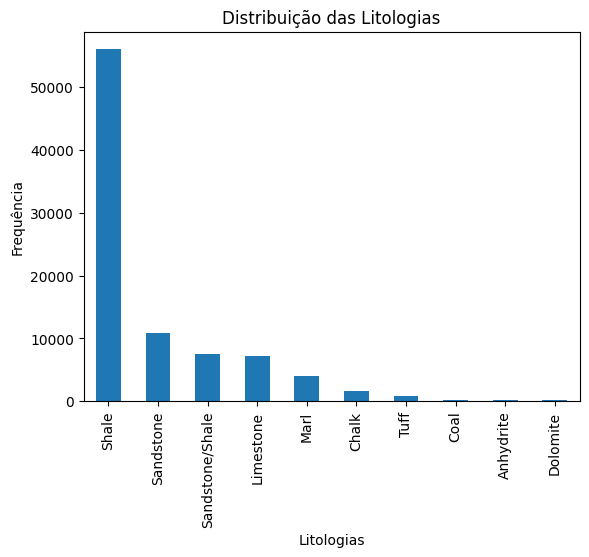

In [18]:
df2['LITHO'].value_counts().plot(kind='bar')

# Adicionar rótulos e título
plt.xlabel('Litologias')
plt.ylabel('Frequência')
plt.title('Distribuição das Litologias')
plt.show()

# Machine Learning

## Divisão dos dados em treino e teste


**X_train e y_train:** São os dados e os rótulos (ou alvos/targets) que serão usados para treinar o modelo.

**X_test e y_test:** São os dados e os rótulos que serão usados para testar o modelo após o treinamento, permitindo avaliar o desempenho do modelo em dados que ele ainda não viu.

**O parâmetro test_size=0.3** indica que 30% dos dados serão reservados para teste, enquanto os 70% restantes serão usados para treinamento.

**E por que separar em treino e teste?**

Separar os dados em treino e teste é muito importante para avaliar a capacidade de generalização do modelo. Esse processo permite verificar como o modelo se comporta em dados novos e avaliar o quão bem ele aprendeu os padrões dos dados de treino.

In [19]:
# Dividindo o DataFrame em treino e teste (70% treino, 30% teste)
df_train, df_test = train_test_split(df2, test_size=0.3, random_state=42)

# Separando X e y para o DataFrame de treino
X_train = df_train[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y_train = df_train['LITHO']

# Separando X e y para o DataFrame de teste
X_test = df_test[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y_test = df_test['LITHO']


## Padronização dos dados

**StandardScaler**: ajusta a média para 0 e o desvio padrão para 1.

A padronização é importante em muitos modelos de machine learning porque ela torna as variáveis independentes comparáveis em escala, o que pode melhorar o desempenho e a estabilidade do modelo.



In [20]:
# instanciando o StandardScaler
scaler = StandardScaler()

# aplicando o método fit_transform nos dados de treino
X_train = scaler.fit_transform(X_train)

# transformando os dados de teste com base na escala ajustada nos dados de treino
X_test = scaler.transform(X_test)

## Treinando o modelo de Árvore de Decisão

In [21]:
# instanciando o modelo
arvore_de_decisao = DecisionTreeClassifier(random_state=42)

In [22]:
# treinando o modelo de árvore de decisão (DecisionTreeClassifier)
# usando os dados de treino X_train (curvas) e y_train (litologias).
arvore_de_decisao.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# usando o modelo de árvore de decisão treinado (arvore_de_decisao) para fazer previsões nos dados de teste (X_test)
y_pred = arvore_de_decisao.predict(X_test)

## Avaliando o modelo treinado

**A função accuracy_score(y_test, y_pred)** calcula a acurácia de um modelo de classificação, que é uma métrica para avaliar o desempenho de modelos de machine learning, especialmente em tarefas de classificação.

A acurácia é calculada da seguinte forma:

**Acurácia = n° de previsões corretas / n° de previsões**

Ou seja, é a proporção de previsões corretas em relação ao número total de previsões. O valor da acurácia varia de 0 a 1 (ou de 0% a 100%), onde 1 (ou 100%) significa que todas as previsões foram corretas, enquanto 0 indica que todas foram incorretas.

In [ ]:
accuracy_score(y_test, y_pred)

0.8811188811188811

## Classification Report

O Classification Report gera um relatório de avaliação do desempenho do modelo de classificação em várias métricas, como **precision**, **recall**, **f1-score** e **support** para cada classe no conjunto de dados.

**O que significa cada métrica?**

- **Precision** (Precisão): A proporção de exemplos corretamente classificados como positivos em relação a todos os exemplos que foram classificados como positivos. Indica a qualidade das predições do modelo.

  $$\text{Precisão} = \frac{\text{Previsões corretas da classe}}{\text{Total de previsões para a classe}}$$

- **Recall**: A proporção de exemplos corretamente identificados como positivos em relação ao total de exemplos que deveriam ter sido classificados como positivos. Mede a capacidade do modelo de capturar todos os exemplos positivos.

  $$\text{Recall} = \frac{\text{Previsões corretas da classe}}{\text{Total real da classe}}$$

- **F1-score**: A média harmônica entre precisão e recall. É útil quando há um balanço entre falsos positivos e falsos negativos.

  $$\text{F1-score} = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}}$$

- **Support**: Mostra o número total de ocorrências reais de cada classe no conjunto de teste (`y_test`). Isso ajuda a entender o peso de cada classe no cálculo das métricas agregadas.

## Resultados das Métricas Agregadas

- **Accuracy**: É a taxa geral de acertos. Neste caso, o valor de **0.88** significa que o modelo acertou 88% das previsões.
  
- **Macro avg**: É a média das métricas (precision, recall, f1-score) para todas as classes, tratando cada classe igualmente, sem considerar o número de ocorrências de cada uma.
  
- **Weighted avg**: É a média ponderada das métricas para todas as classes, considerando o número de ocorrências (support) de cada classe. Dessa forma, classes com mais ocorrências têm mais peso no cálculo.



In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       0.97      0.97      0.97        30
          Chalk       0.93      0.92      0.93       464
           Coal       0.65      0.60      0.63        68
       Dolomite       0.16      0.19      0.17        27
      Limestone       0.78      0.79      0.79      2197
           Marl       0.72      0.71      0.72      1208
      Sandstone       0.83      0.84      0.83      3220
Sandstone/Shale       0.68      0.69      0.68      2281
          Shale       0.95      0.94      0.95     16826
           Tuff       0.62      0.66      0.64       277

       accuracy                           0.88     26598
      macro avg       0.73      0.73      0.73     26598
   weighted avg       0.88      0.88      0.88     26598



## Matriz de confusão



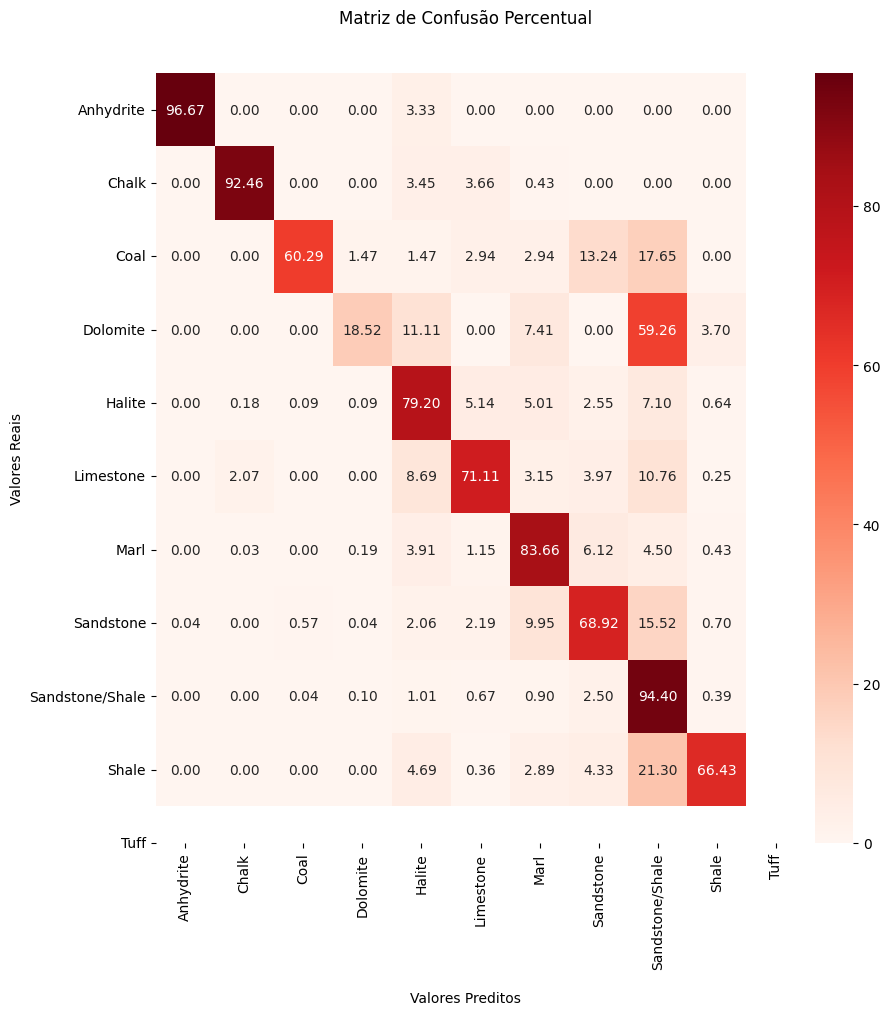

In [ ]:
# calculando a matriz de confusao
matriz_de_confusao_arvore_de_decisao = confusion_matrix(y_test, y_pred)

# convertendo para percentual
matriz_percentual = matriz_de_confusao_arvore_de_decisao.astype('float') / matriz_de_confusao_arvore_de_decisao.sum(axis=1)[:, np.newaxis] * 100

# ordenando as litologias
labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff', 'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite']
labels.sort()

# configurando o grafico
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(matriz_percentual, annot=True, cmap='Reds', fmt='.2f',
                 xticklabels=labels,
                 yticklabels=labels)

# configurando os titulos
ax.set_title('Matriz de Confusão Percentual\n\n')
ax.set_xlabel('\nValores Preditos')
ax.set_ylabel('Valores Reais')
plt.show()

## Feature importance

Feature Importance (Importância das Variáveis) é uma técnica utilizada  para avaliar a relevância de cada feature no processo de tomada de decisão de um modelo preditivo. Em outras palavras, ela indica quais curvas contribuem mais significativamente para as previsões feitas pela nossa árvore.

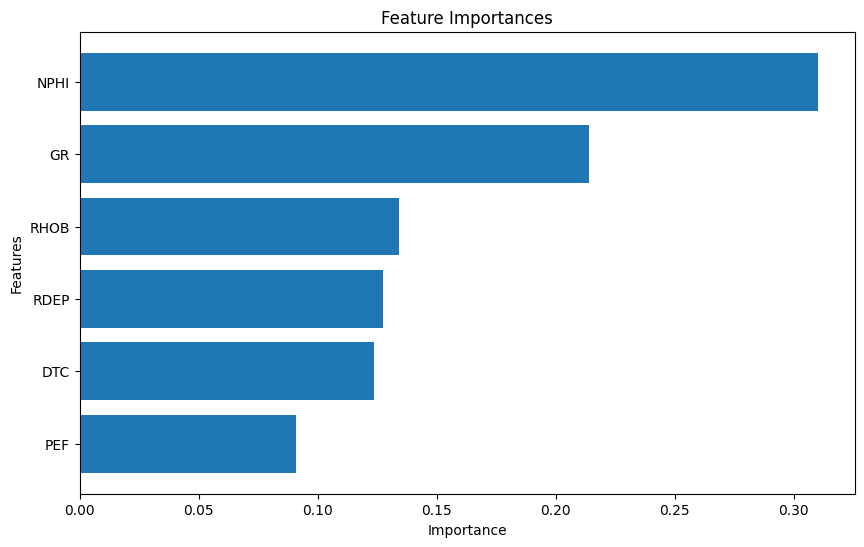

In [28]:
# Obtendo as importâncias das features da árvore de decisão treinada

feature_importances = arvore_de_decisao.feature_importances_

# Lista de nomes das features usadas no modelo
features = ['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']

# Criando um DataFrame para organizar as importâncias das features e ordená-las em ordem decrescente
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)  # Ordena o DataFrame pela importância

# Configurando a plotagem das importâncias das features
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.barh(importances_df['Feature'], importances_df['Importance'], align='center')  # Cria um gráfico de barras horizontal
plt.gca().invert_yaxis()  # Inverte o eixo Y para que as features mais importantes apareçam no topo
plt.xlabel('Importance')  # Adiciona rótulo ao eixo X
plt.ylabel('Features')  # Adiciona rótulo ao eixo Y
plt.title('Feature Importances')  # Adiciona título ao gráfico
plt.show()  # Exibe o gráfico

## Como ficou a aparência da nossa árvore?

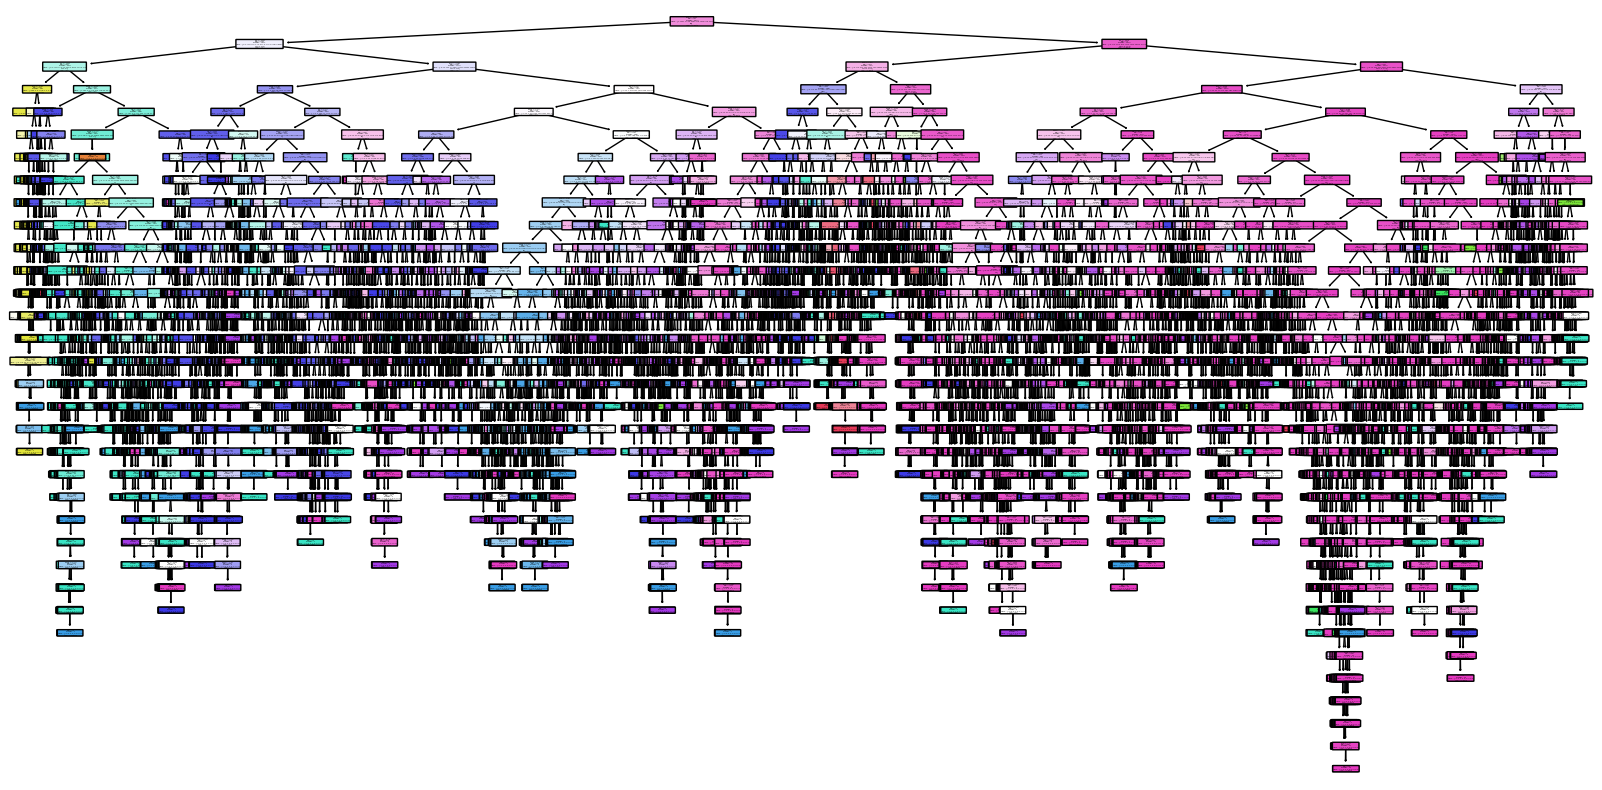

In [ ]:
# from sklearn import tree

# PLOTAR A ÁRVORE GERADA PELO NOSSO MODELO
# plt.figure(figsize=(20, 10))
# tree.plot_tree(arvore_de_decisao,
#                feature_names=['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC'] ,
#                class_names=['Shale', 'Sandstone', 'Sandstone/Shale', 'Chalk', 'Marl',
#        'Limestone', 'Tuff', 'Coal', 'Dolomite', 'Anhydrite'],
#                filled=True,
#                rounded=True)
# plt.show()

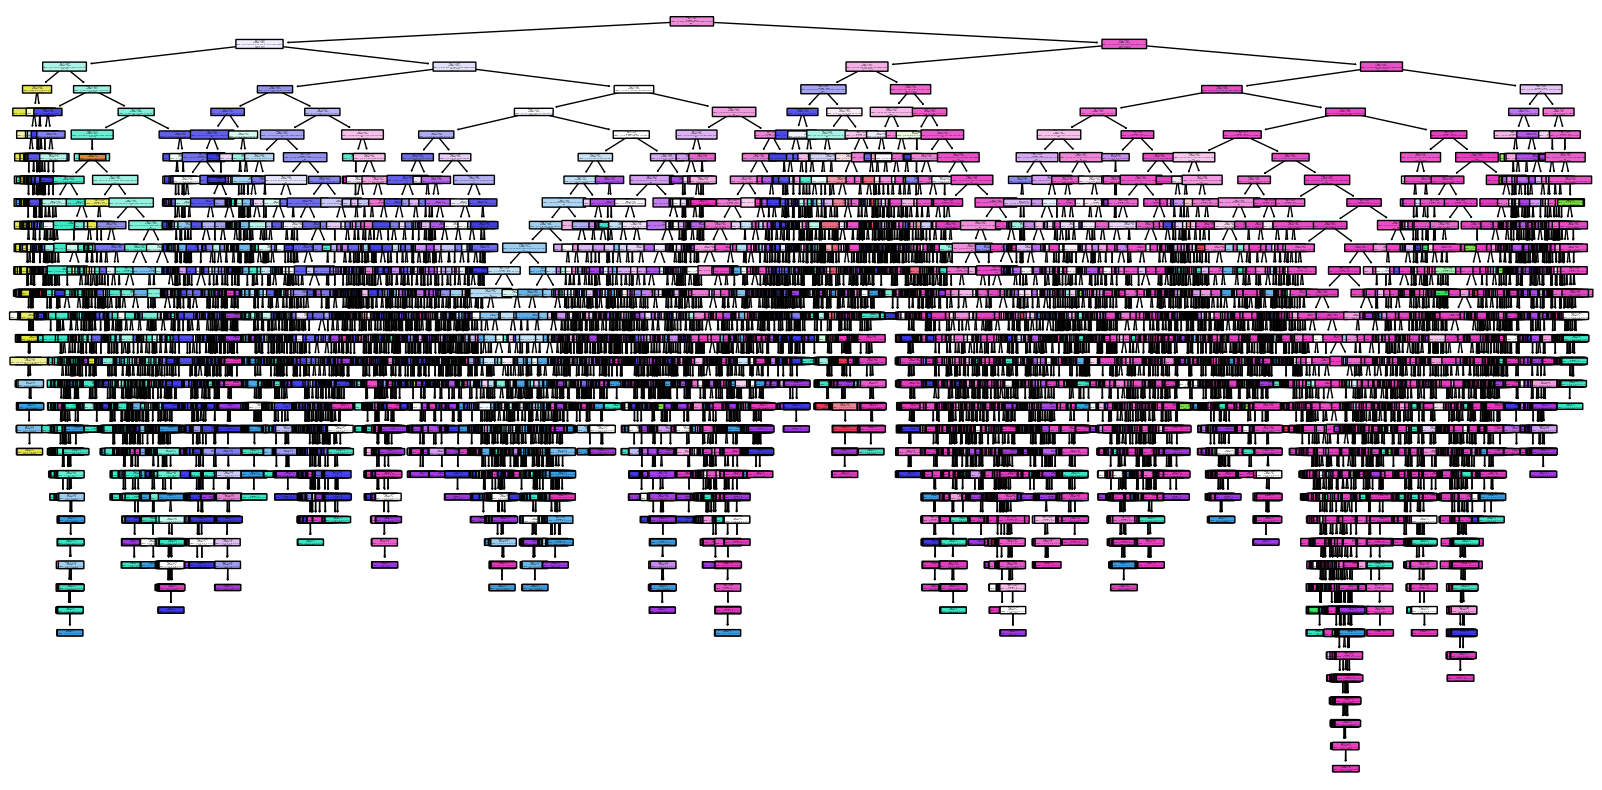

# Teste em novos dados

In [29]:
df_cego = pd.read_excel('/content/drive/MyDrive/dados_minicurso_ml_petrofisica/teste_cego.xlsx')

In [30]:
df_cego

CALI        RDEP      RHOB          GR      NPHI       PEF         DTC
0   8.488620    7.357070  2.673971  127.511414  0.148865  4.197044   70.084953
1  12.089755  449.609467  2.607089    6.745884  0.174852  4.189444   70.673042
2  12.155211    8.702724  2.581057   69.705147  0.188852  4.281436   71.830750
3   8.424135    7.884399  2.607089   34.978462  0.081630  4.962146   59.049568
4  12.472137   85.196434  2.094105   11.216806  0.039914  6.934591   71.119881
5  18.491930    0.731400  2.110167   74.099129  0.307891  4.410139  150.661758
6  12.577546    2.846433  2.623708   48.710045  0.158731  5.043734   78.880089
7  12.628696    0.447726  2.268672   84.563484  0.415703  6.934591  134.713913
8  14.129828    1.692587  2.429597   35.269016  0.207991  4.591702   92.872452
9   8.690719    1.947520  2.493664   30.066509  0.108503  5.043734   63.251072

In [31]:
# Separando os dados que utilizaremos para prever as litologias
df_cego = df_cego[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]

In [32]:
novas_previsoes = arvore_de_decisao.predict(df_cego)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [33]:
#transformando as previsoes em uma coluna do dataframe
df_cego['litologias_preditas'] = novas_previsoes

In [34]:
#visualizando o dataframe com as novas previsoes
df_cego

RDEP      RHOB          GR      NPHI       PEF         DTC  \
0    7.357070  2.673971  127.511414  0.148865  4.197044   70.084953   
1  449.609467  2.607089    6.745884  0.174852  4.189444   70.673042   
2    8.702724  2.581057   69.705147  0.188852  4.281436   71.830750   
3    7.884399  2.607089   34.978462  0.081630  4.962146   59.049568   
4   85.196434  2.094105   11.216806  0.039914  6.934591   71.119881   
5    0.731400  2.110167   74.099129  0.307891  4.410139  150.661758   
6    2.846433  2.623708   48.710045  0.158731  5.043734   78.880089   
7    0.447726  2.268672   84.563484  0.415703  6.934591  134.713913   
8    1.692587  2.429597   35.269016  0.207991  4.591702   92.872452   
9    1.947520  2.493664   30.066509  0.108503  5.043734   63.251072   

  litologias_preditas  
0               Shale  
1               Shale  
2               Shale  
3               Shale  
4               Shale  
5               Shale  
6               Shale  
7               Shale  
8               Shale  
9               Shale

#  ABRINDO E EXPLORANDO OS DADOS DLIS

In [35]:
# carregando o arquivo dlis
f, *tail = dlis.load('/content/drive/MyDrive/dados_minicurso_ml_petrofisica/3-brsa-1238-rjs_raw1.dlis')

In [36]:
# primeiro arquivo logico
f

LogicalFile(GEOLOAD.1)

In [37]:
# lista com os demais arquivos logicos
tail

[LogicalFile(GEOLOAD.2), LogicalFile(GEOLOAD.3)]

In [38]:
# descrição do arquivo logico
f.describe()

------------
Logical File
------------
Description : LogicalFile(GEOLOAD.1)
Frames      : 1
Channels    : 46

Known objects
--
CHANNEL     : 46
FRAME       : 1
PARAMETER   : 129
NO-FORMAT   : 1
FILE-HEADER : 1
TOOL        : 9
ORIGIN      : 1
COMMENT     : 2

Unknown objects
--
280-FRAMESTEP-INFO : 1


In [39]:
# extraindo a origem do arquivo lógico
origin = f.origins

In [40]:
origin

[Origin(0)]

In [41]:
# descrição da origem
origin[0].describe()

------
Origin
------
name   : 0
origin : 2
copy   : 0

Logical file ID          : GEOLOAD.1
File set name and number : PETROBRAS/3-BRSA-1238-RJS / 305094386
File number and type     : 1 / PLAYBACK

Field                   : ALBACORA
Well (id/name)          : 74281027542 / 3-BRSA-1238-RJS
Produced by (code/name) : 280 / Halliburton
Produced for            : PETROBRAS
Run number              : 01
Created                 : 2013-09-10 15:00:30

Created by : GEOLOAD, (version: 5.1)


In [42]:
for frame in f.frames:
    # Itera por cada frame presente na coleção de frames `f.frames`.

    for channel in frame.channels:
        # Itera por cada canal presente na lista de canais do frame atual.

        if channel.name == frame.index:
            # Verifica se o nome do canal atual é igual ao índice do frame.

            depth_units = channel.units
            # Se a condição acima for verdadeira, armazena a unidade de profundidade (units) do canal.

    print(f'Frame Name: \t\t {frame.name}')
    # Imprime o nome do frame.

    print(f'Index Type: \t\t {frame.index_type}')
    # Imprime o tipo de índice do frame.

    print(f'Depth Interval: \t {frame.index_min} - {frame.index_max} {depth_units}')
    # Imprime o intervalo de profundidade do frame, mostrando o valor mínimo e máximo, seguido da unidade de profundidade.

    print(f'Depth Spacing: \t\t {frame.spacing} {depth_units}')
    # Imprime o espaçamento de profundidade entre os pontos, seguido da unidade de profundidade.

    print(f'Direction: \t\t {frame.direction}')
    # Imprime a direção de aquisição dos dados do frame (por exemplo, ascendente ou descendente).

    print(f'Num of Channels: \t {len(frame.channels)}')
    # Imprime o número de canais presentes no frame.

    print(f'Channel Names: \t\t {str(frame.channels)}')
    # Imprime a lista de nomes dos canais presentes no frame convertida em string para facilitar a visualização.

    print('\n\n')
    # Imprime duas quebras de linha para separar visualmente as informações de cada frame.


Frame Name: 		 50
Index Type: 		 BOREHOLE-DEPTH
Depth Interval: 	 None - None m
Depth Spacing: 		 -0.10000000149011612 m
Direction: 		 DECREASING
Num of Channels: 	 46
Channel Names: 		 [Channel(TDEP), Channel(TEM2), Channel(BS), Channel(CS), Channel(MINM), Channel(TENS), Channel(RT90), Channel(RT60), Channel(RT30), Channel(RT20), Channel(RT10), Channel(DLIM), Channel(DPHD), Channel(DPHI), Channel(DPHS), Channel(DRHO), Channel(PE), Channel(RHOB), Channel(AHV), Channel(AHVT), Channel(BHV), Channel(BHVT), Channel(CALI), Channel(DCAL), Channel(FDSN), Channel(GR), Channel(NDSN), Channel(NLIM), Channel(NPHD), Channel(NPHI), Channel(NPHS), Channel(NRAT), Channel(FBA), Channel(FDE), Channel(FHI), Channel(FLI), Channel(FLO), Channel(FPK), Channel(NBA), Channel(NDE), Channel(NHI), Channel(NLI), Channel(NLO), Channel(NPK), Channel(ITT), Channel(DT)]





In [43]:
def summary_dataframe(object, **kwargs):
    # Define uma função chamada `summary_dataframe` que aceita um objeto e argumentos nomeados variáveis (kwargs).

    # Cria um dataframe vazio.
    df = pd.DataFrame()

    # Itera sobre cada par chave-valor dos argumentos nomeados fornecidos.
    for i, (key, value) in enumerate(kwargs.items()):
        list_of_values = []
        # Inicializa uma lista vazia para armazenar os valores correspondentes à chave atual.

        # Itera sobre cada item no objeto fornecido.
        for item in object:
            # Trata a presença de valores ausentes.
            try:
                x = getattr(item, key)
                # Obtém o atributo do item com o nome especificado pela chave.

                list_of_values.append(x)
                # Adiciona o valor obtido à lista de valores.

            except:
                list_of_values.append('')
                # Se ocorrer um erro (por exemplo, se o atributo não existir), adiciona uma string vazia à lista.
                continue
                # Continua para a próxima iteração.

        # Adiciona uma nova coluna ao dataframe `df`, usando o valor fornecido nos argumentos nomeados como o nome da coluna.
        df[value] = list_of_values

    # Ordena o dataframe pela primeira coluna e o retorna.
    return df.sort_values(df.columns[0])


In [44]:
param_df = summary_dataframe(f.parameters, name='Name', long_name='Long Name', values='Value')
# Chama a função `summary_dataframe` passando `f.parameters` como o objeto a ser iterado e define nomes de colunas
# como 'Name', 'Long Name' e 'Value', criando um DataFrame chamado `param_df`.

# Ocultando nomes de pessoas que podem estar nos parâmetros.
# Estas duas linhas podem ser comentadas para mostrar esses nomes.
mask = param_df['Name'].isin(['R8', 'RR1', 'WITN', 'ENGI'])
# Cria uma máscara booleana para identificar as linhas do DataFrame `param_df` onde a coluna 'Name' contém
# valores específicos ('R8', 'RR1', 'WITN', 'ENGI').

param_df = param_df[~mask]
# Filtra o DataFrame `param_df` para remover as linhas que atendem à máscara criada, ocultando essas entradas.

param_df
# Exibe o DataFrame resultante `param_df`.


Name                       Long Name              Value
0     APD           ABOVE PERMANENT DATUM             [28.0]
1    APIN             API WELLHOLE NUMBER      [74281027542]
2     BAP       Elevation of Ground Level          [-999.25]
3    BARI               BARITE CORRECTION              [OFF]
4    BASI                           BASIN       [CAMPOS MAR]
..    ...                             ...                ...
118  TTL1             HEADER TITLE LINE 1     [3-AB-126-RJS]
119  TTL4             HEADER TITLE LINE 4            [1:200]
120  WIT2                  WITNESS 2 NAME          [EDUARDO]
122    WN                   WELL NAME ANP  [3-BRSA-1238-RJS]
123   XTP  MAX. REC TEMP. @ 1 (OPEN HOLE)           [4802.0]

[126 rows x 3 columns]

In [45]:
channels = summary_dataframe(f.channels, name='Name', long_name='Long Name',
                             dimension='Dimension', units='Units', frame='Frame')
channels

Name                      Long Name Dimension Units      Frame
18   AHV                    AHV/AHV Inc       [1]    m3  Frame(50)
19  AHVT            AHVT/Annular Volume       [1]    m3  Frame(50)
20   BHV                    BHV/BHV Inc       [1]    m3  Frame(50)
21  BHVT           BHVT/Borehole Volume       [1]    m3  Frame(50)
2     BS                    BS/Bit Size       [1]    in  Frame(50)
22  CALI                   CALI/Caliper       [1]    in  Frame(50)
3     CS                  CS/Line Speed       [1]   mpm  Frame(50)
23  DCAL              DCAL/Diff Caliper       [1]    in  Frame(50)
11  DLIM                DLIM/DenPhiLime       [1]  decp  Frame(50)
12  DPHD                DPHD/DenPhiDolo       [1]  decp  Frame(50)
13  DPHI           DPHI/DensityPorosity       [1]  decp  Frame(50)
14  DPHS                DPHS/DenPhiSand       [1]  decp  Frame(50)
15  DRHO               DRHO/DensityCorr       [1]  g/cc  Frame(50)
45    DT          DT/WAVE Compressional       [1]  uspf  Frame(50)
32   FBA                  FBA/FarBarite       [1]   cps  Frame(50)
33   FDE                 FDE/FarDensity       [1]   cps  Frame(50)
24  FDSN            FDSN/DSN Far Counts       [1]   cps  Frame(50)
34   FHI                    FHI/FarHigh       [1]   cps  Frame(50)
35   FLI               FLI/FarLithology       [1]   cps  Frame(50)
36   FLO                     FLO/FarLow       [1]   cps  Frame(50)
37   FPK                    FPK/FarPeak       [1]   cps  Frame(50)
25    GR                   GR/Gamma API       [1]  gapi  Frame(50)
44   ITT                        ITT/ITT       [1]    ms  Frame(50)
4   MINM               MINM/Minute Mark       [1]  NONE  Frame(50)
38   NBA                 NBA/NearBarite       [1]   cps  Frame(50)
39   NDE                NDE/NearDensity       [1]   cps  Frame(50)
26  NDSN           NDSN/DSN Near Counts       [1]   cps  Frame(50)
40   NHI                   NHI/NearHigh       [1]   cps  Frame(50)
41   NLI              NLI/NearLithology       [1]   cps  Frame(50)
27  NLIM              NLIM/Neu Por Lime       [1]  decp  Frame(50)
42   NLO                    NLO/NearLow       [1]   cps  Frame(50)
28  NPHD     NPHD/Neutron Porosity Dolo       [1]  decp  Frame(50)
29  NPHI          NPHI/Neutron Porosity       [1]        Frame(50)
30  NPHS     NPHS/Neutron Porosity Sand       [1]  decp  Frame(50)
43   NPK                   NPK/NearPeak       [1]   cps  Frame(50)
31  NRAT     NRAT/DSN Near to Far Ratio       [1]  NONE  Frame(50)
16    PE                          PE/Pe       [1]   b/e  Frame(50)
17  RHOB                   RHOB/Density       [1]  g/cc  Frame(50)
10  RT10  RT10/10in Resistivity 2ft Res       [1]  ohmm  Frame(50)
9   RT20  RT20/20in Resistivity 2ft Res       [1]  ohmm  Frame(50)
8   RT30  RT30/30in Resistivity 2ft Res       [1]  ohmm  Frame(50)
7   RT60  RT60/60in Resistivity 2ft Res       [1]  ohmm  Frame(50)
6   RT90  RT90/90in Resistivity 2ft Res       [1]  ohmm  Frame(50)
0   TDEP                          DEPT/       [1]     m  Frame(50)
1   TEM2             TEM2/Borehole Temp       [1]  degF  Frame(50)
5   TENS                   TENS/Tension       [1]   lbs  Frame(50)

In [46]:
tools = summary_dataframe(f.tools, name='Name', description='Description')
tools

Name Description
2  ACRt_S            
8  Acoust            
5  DSNT              
1  Depth_            
6  GTET              
7  R:comp            
0  RWCH              
4  SDLT              
3  SDLT_P

In [47]:
frames = f.frames
# Armazena todos os frames do arquivo lógico `f` em uma variável `frames`.

file_data_frames = []  # Lista para armazenar os DataFrames de cada frame dentro de um arquivo lógico.

for frame in frames:
    # Itera sobre cada frame na lista de `frames`.

    print(frame.index)
    # Imprime o índice do frame atual.

    curvas = frame.curves()
    # Armazena as curvas do frame em uma variável `curvas`.

    data = {}
    # Inicializa um dicionário vazio `data` para armazenar os dados das curvas.

    for name in curvas.dtype.names:
        # Itera sobre os nomes das curvas.

        if curvas[name].ndim == 1:  # Verifica se a curva é unidimensional.
            # Se a curva for unidimensional, ela é adicionada ao dicionário `data`.
            data[name] = curvas[name]

    df = pd.DataFrame(data, index=curvas[frame.index])
    # Cria um DataFrame `df` a partir do dicionário `data`, usando o índice das curvas.

    file_data_frames.append(df)  # Adiciona o DataFrame `df` à lista `file_data_frames`.

# Concatenar todos os DataFrames da lista `file_data_frames` em um único DataFrame.
file_result_df = pd.concat(file_data_frames, ignore_index=False)  # Manter o índice de profundidade.


TDEP


In [48]:
# visualizando o dataframe resultante
file_result_df

FRAMENO         TDEP        TEM2   BS        CS  MINM  \
4804.600098        1  4804.600098  166.994415  8.5  3.399993     0   
4804.500098        2  4804.500098  167.687988  8.5  5.799988     0   
4804.400098        3  4804.400098  166.538452  8.5  5.999988     0   
4804.300098        4  4804.300098  167.286377  8.5  5.899988     0   
4804.200098        5  4804.200098  167.834061  8.5  5.999988     0   
...              ...          ...         ...  ...       ...   ...   
4485.400093     3193  4485.400093  164.007782  8.5  6.199988     0   
4485.300093     3194  4485.300093  164.953598  8.5  6.099988     0   
4485.200093     3195  4485.200093  163.726059  8.5  5.999988     0   
4485.100093     3196  4485.100093  164.416901  8.5  6.099988     0   
4485.000093     3197  4485.000093  164.753433  8.5  5.999988     0   

                    TENS        RT90        RT60        RT30  ...         FLO  \
4804.600098  5647.178711 -999.250000 -999.250000 -999.250000  ... -999.250000   
4804.500098  5747.828125 -999.250000 -999.250000 -999.250000  ... -999.250000   
4804.400098  5849.548340 -999.250000 -999.250000 -999.250000  ... -999.250000   
4804.300098  5893.156738 -999.250000 -999.250000 -999.250000  ... -999.250000   
4804.200098  5937.075684 -999.250000 -999.250000 -999.250000  ... -999.250000   
...                  ...         ...         ...         ...  ...         ...   
4485.400093  6267.078125   85.319695  134.037369   36.073627  ...   89.333336   
4485.300093  6336.170410   66.280716  105.418190   33.311436  ...   78.333336   
4485.200093  6327.364258   65.546669  104.877747   39.852028  ...   94.666664   
4485.100093  6311.083008   85.019142  134.951904   53.598782  ...   87.666664   
4485.000093  6384.020508  143.154449  220.476730   88.276642  ...   98.666664   

                    FPK          NBA          NDE         NHI         NLI  \
4804.600098 -999.250000  -999.250000  -999.250000 -999.250000 -999.250000   
4804.500098 -999.250000  -999.250000  -999.250000 -999.250000 -999.250000   
4804.400098 -999.250000  -999.250000  -999.250000 -999.250000 -999.250000   
4804.300098 -999.250000  -999.250000  -999.250000 -999.250000 -999.250000   
4804.200098 -999.250000  -999.250000  -999.250000 -999.250000 -999.250000   
...                 ...          ...          ...         ...         ...   
4485.400093  250.666672  3211.727295  1392.181763  138.090912  514.545471   
4485.300093  240.666672  3226.545410  1390.181763  143.272720  544.000000   
4485.200093  274.666656  3215.909180  1345.636353  156.090912  568.000000   
4485.100093  255.666672  3131.454590  1287.454590  167.545456  554.363647   
4485.000093  276.000000  3106.454590  1276.363647  161.272720  530.000000   

                    NLO         NPK     ITT      DT  
4804.600098 -999.250000 -999.250000 -999.25 -999.25  
4804.500098 -999.250000 -999.250000 -999.25 -999.25  
4804.400098 -999.250000 -999.250000 -999.25 -999.25  
4804.300098 -999.250000 -999.250000 -999.25 -999.25  
4804.200098 -999.250000 -999.250000 -999.25 -999.25  
...                 ...         ...     ...     ...  
4485.400093  148.727280  470.545441 -999.25 -999.25  
4485.300093  160.454544  445.818176 -999.25 -999.25  
4485.200093  151.363632  449.090912 -999.25 -999.25  
4485.100093  148.090912  460.545441 -999.25 -999.25  
4485.000093  144.363632  486.000000 -999.25 -999.25  

[3197 rows x 47 columns]

In [49]:
# visualizando a maior profundidade encontrada
file_result_df.index.max()

4804.60009765625

In [50]:
# visualizando as curvas listadas por ordem alfabética
print(sorted(list(file_result_df.columns)))

['AHV', 'AHVT', 'BHV', 'BHVT', 'BS', 'CALI', 'CS', 'DCAL', 'DLIM', 'DPHD', 'DPHI', 'DPHS', 'DRHO', 'DT', 'FBA', 'FDE', 'FDSN', 'FHI', 'FLI', 'FLO', 'FPK', 'FRAMENO', 'GR', 'ITT', 'MINM', 'NBA', 'NDE', 'NDSN', 'NHI', 'NLI', 'NLIM', 'NLO', 'NPHD', 'NPHI', 'NPHS', 'NPK', 'NRAT', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30', 'RT60', 'RT90', 'TDEP', 'TEM2', 'TENS']


In [51]:
# filtrando as curvas de interesse
result_df_filtrado = file_result_df[[ "DT", "GR", "NPHI", "PE", "RHOB", "CALI", "RT90"
]]

In [52]:
# configurando o pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)

In [53]:
# visualizando o dataframe filtrado
result_df_filtrado

DT          GR        NPHI          PE        RHOB  \
4804.600098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4804.500098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4804.400098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4804.300098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4804.200098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4804.100098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4804.000098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.900098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.800098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.700098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.600098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.500098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.400098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.300098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.200098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.100098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4803.000098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.900098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.800098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.700098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.600098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.500098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.400098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.300098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.200098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.100098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4802.000098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.900098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.800098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.700098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.600098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.500098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.400098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.300098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.200098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.100098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4801.000098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.900098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.800098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.700098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.600098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.500098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.400098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.300098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.200098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.100098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4800.000098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4799.900098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4799.800098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4799.700098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4799.600098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4799.500098 -999.250000 -999.250000 -999.250000 -999.250000 -999.250000   
4799.400098 -999.250000 -999.250000 -999.25000

In [54]:
# substituindo os valores -999.25000 por nan
result_df_filtrado.replace(-999.250000, np.nan, inplace=True)

# organizando os dados por ordem crescente e removendo os dados nulos
combined_df = result_df_filtrado.sort_index().dropna()

combined_df

<ipython-input-54-8a577bf1fb36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_filtrado.replace(-999.250000, np.nan, inplace=True)


DT          GR       NPHI         PE      RHOB       CALI  \
4490.000093  57.930321   14.008424  28.128716  11.079301  1.952368   8.626446   
4490.100093  57.740582   13.890012  26.352619  11.018345  1.969113   8.630782   
4490.200093  57.436089   14.519311  24.458574  11.107488  1.982828   8.631057   
4490.300093  56.906345   14.816460  24.687155  11.156636  1.991167   8.632654   
4490.400093  56.057575   15.616302  23.908802  11.167657  2.022433   8.631503   
4490.500093  55.118782   15.539595  23.119448  10.963456  2.036863   8.628659   
4490.600093  54.291134   15.318409  20.807688  10.673941  2.064185   8.630133   
4490.700093  53.656036   13.439448  13.976981  10.112646  2.109950   8.630348   
4490.800093  53.105209   12.390864  10.766781  10.087363  2.130558   8.626151   
4490.900093  52.842266   11.392178   8.836710  10.304358  2.133932   8.629075   
4491.000093  52.669617   11.119606   7.320738  11.061377  2.143589   8.628919   
4491.100093  52.079426   11.396646   7.314754  11.384394  2.148920   8.629436   
4491.200093  51.555107   11.360899   7.392169  11.506207  2.159330   8.630898   
4491.300093  51.033146   11.432393   7.267353  11.579778  2.164781   8.635680   
4491.400093  50.910652   10.485093   7.341282  11.679446  2.170144   8.631707   
4491.500093  50.860100   10.304123   7.411623  11.827372  2.183918   8.626661   
4491.600093  50.879826    9.855049   7.484740  11.884397  2.205066   8.619071   
4491.700093  50.885464   10.196881   7.510205  11.906455  2.263306   8.624665   
4491.800093  50.959003   10.831394   7.566060  11.830715  2.288032   8.625525   
4491.900093  51.053970   11.787631   7.826440  11.849514  2.311910   8.616942   
4492.000093  51.154491   13.101339   9.056513  12.030784  2.370501   8.619324   
4492.100093  51.250118   12.931540   9.659757  12.287087  2.398820   8.615414   
4492.200093  51.354996   12.547258   9.215546  12.542182  2.416306   8.614798   
4492.300093  51.559006   11.439096   8.878641  13.119719  2.396533   8.612329   
4492.400093  51.776047   11.275999   9.155405  13.156381  2.367105   8.614646   
4492.500093  52.111385   11.144182   9.671509  13.114814  2.339934   8.622448   
4492.600093  52.320503   11.175461  10.554908  12.545057  2.320895   8.625648   
4492.700093  52.554737   10.757666  10.705108  12.369450  2.310654   8.621693   
4492.800093  52.842743   10.826925  11.372129  12.078401  2.311478   8.615588   
4492.900093  53.202576   11.061517  11.918594  11.775901  2.320592   8.613256   
4493.000093  53.595104   12.931540  14.038881  10.937720  2.365551   8.607420   
4493.100093  53.899178   13.630845  14.713841  10.405989  2.404135   8.592942   
4493.200093  53.969082   14.066513  14.875692   9.883571  2.443038   8.584495   
4493.300093  53.917633   14.727836  15.130630   8.779272  2.535926   8.555586   
4493.400093  53.964268   15.556724  16.078659   8.283017  2.591085   8.532142   
4493.500093  54.269039   16.667120  16.845236   7.832006  2.633985   8.519660   
4493.600093  54.628624   18.454479  17.894098   7.052619  2.696274   8.592556   
4493.700093  55.085838   19.171658  18.271101   6.885316  2.691969   8.535378   
4493.800093  55.885696   20.165874  18.773161   6.679544  2.696146   8.558250   
4493.900093  56.269291   22.958624  18.841467   6.620942  2.709037   8.558421   
4494.000093  56.534966   23.968481  18.177834   6.513776  2.771950   8.515468   
4494.100093  56.840435   23.566324  17.871990   6.551282  2.862006   8.512262   
4494.200093  56.848969   19.786062  17.540936   6.702791  3.098968   8.601369   
4494.300093  56.896965   17.757410  16.642788   6.853020  3.173943   8.564412   
4494.400093  57.078411   17.096087  15.611514   7.032565  3.206698   8.540670   
4494.500093  57.436974   17.945082  14.947269   7.268400  3.203683   8.606142   
4494.600093  57.785202   24.397448  13.373507   7.608595  3.166627   8.575271   
4494.700093  58.252865   28.731792  13.091575   7.696824  3.146685   8.511677   
4494.800093  59.485096   32.020531  13.426993   7.3

In [ ]:
# exportando os dados escolhidos e limpos para excel
combined_df.to_excel('curvas_escolhidas.xlsx')

## PLOTANDO UM PERFIL COMPOSTO

In [55]:
# configurando das escalas para cada curva
curve_columns = {
    'DT': {'range': [140, 40], 'title': 'SÔNICO COMP. (µs/ft)'},
    'GR': {'range': [0, 150], 'title': 'RAIOS GAMA (API)'},
    'NPHI': {'range': [45, -15], 'title': 'POROSI. NEUT. (%)'},
    'RHOB': {'range': [1.95, 2.95], 'title': 'DENSIDADE (g/cm³)'},
    'CALI': {'range': [6, 16], 'title': 'CALIPER (in)'},
    'RT90': {'range': [0.20, 2000], 'title': 'RES. PROF. (ohm.m)'}
}

# criando subplots sem títulos de subplot para evitar duplicação
fig = make_subplots(rows=1, cols=len(curve_columns), shared_yaxes=True, horizontal_spacing=0.02)

# adicionando cada curva ao gráfico composto com escalas específicas
for i, (col, config) in enumerate(curve_columns.items(), start=1):
    fig.add_trace(go.Scatter(x=combined_df[col], y=combined_df.index, mode='lines', name=col), row=1, col=i)
    fig.update_xaxes(title_text=config['title'], title_standoff=0, range=config['range'],
                     type=config.get('type', 'linear'), row=1, col=i, side='top')

# Ajuste o layout para uma visualização de perfil composta
fig.update_layout(height=800, width=1200, title_text="Perfil Composto 3-BRSA-1238-RJS",
                 yaxis=dict(title="Profundidade (m)", autorange="reversed"),
                 showlegend=False)

# Exibe o gráfico interativo
fig.show()

In [56]:
# criando subplots com uma única coluna de gráficos e linhas compartilhando o eixo y
fig = go.Figure()

# Plot para CALI
fig.add_trace(go.Scatter(
    x=combined_df['CALI'], y=combined_df.index,
    mode='lines', line=dict(color='gray', width=0.7),  # Linha mais fina
    name='CALI', xaxis='x1'
))

# Plot para GR sobreposto ao CALI
fig.add_trace(go.Scatter(
    x=combined_df['GR'], y=combined_df.index,
    mode='lines', line=dict(color='green', width=0.7),  # Linha mais fina
    name='GR', xaxis='x2'
))

# Plot para Resistividade Profunda
fig.add_trace(go.Scatter(
    x=combined_df['RT90'], y=combined_df.index,
    mode='lines', line=dict(color='blue', width=0.7),  # Linha mais fina
    name='RES. PROF.', xaxis='x3'
))

# Plot para NPHI
fig.add_trace(go.Scatter(
    x=combined_df['NPHI'], y=combined_df.index,
    mode='lines', line=dict(color='blue', width=0.5),  # Linha mais fina
    name='NPHI', xaxis='x4'
))

# Plot para RHOB sobreposto ao NPHI
fig.add_trace(go.Scatter(
    x=combined_df['RHOB'], y=combined_df.index,
    mode='lines', line=dict(color='red', width=0.5),  # Linha mais fina
    name='RHOB', xaxis='x5'
))

# Configuração dos eixos x (faixa, tipo e cor)
fig.update_layout(
    xaxis1=dict(domain=[0, 0.2], range=[6, 16], title='CALI', side='top', tickfont=dict(color='gray'), title_font = dict(color='gray')),
    xaxis2=dict(domain=[0, 0.2], range=[0, 150], overlaying='x1', title='GR', side='bottom', tickfont=dict(color='green'), title_font = dict(color='green')),
    xaxis3=dict(domain=[0.25, 0.45], type='log', range=[-0.7, 3.3], title='RES. PROF.', side='top', tickfont=dict(color='blue'), title_font = dict(color='blue')),
    xaxis4=dict(domain=[0.55, 0.75], range=[45, -15], title='NPHI', side='top', tickfont=dict(color='blue'), title_font = dict(color='blue')),
    xaxis5=dict(domain=[0.55, 0.75], range=[1.95, 2.95], overlaying='x4', title='RHOB', side='bottom', tickfont=dict(color='red'), title_font = dict(color='red')),
    yaxis=dict(title='Depth (m)', autorange='reversed', showspikes=False, spikemode='across', spikesnap='cursor', spikethickness=1),
    height=800,
    #hovermode="y",
    showlegend=False,
    margin=dict(t=20, b=20)
)

# Exibindo o gráfico interativo
fig.show()


In [ ]:
fig.write_html("perfil_composto_minicurso.html")